# Plots

In [2]:
import numpy as np
import ParticleSwarmOptimization as PSO
import display
import matplotlib.pyplot as plt

## No constraint

### Case 1

MovieWriter ffmpeg unavailable; using Pillow instead.


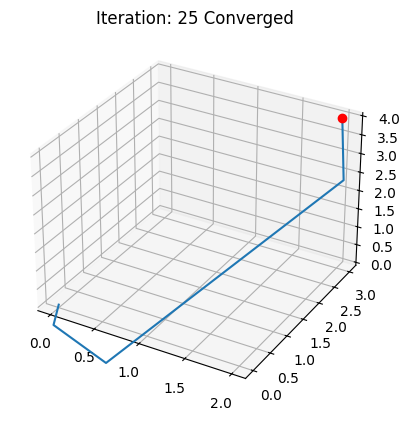

In [ ]:
link=[2,1,3,2]
target=[2,3,4]
c_soc=1.49445
c_cog=1.49445
pop_size=100
max_iter=5000
w_best=0.5
theta,alpha,err, it, c = PSO.PSO(link, target, pop_size, max_iter, w_best, c_soc, c_cog)   
display.Display_animated(link,theta, alpha, target, 'unc_standard1')

### Case 2

MovieWriter ffmpeg unavailable; using Pillow instead.


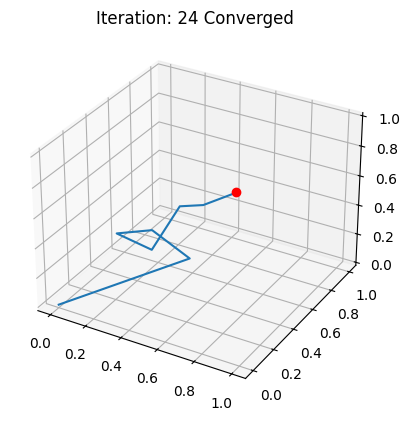

In [10]:
link=[0.5,0.2,0.25,0.3,0.2,0.2,0.1]
target=[0.7,0.5,0.7]
c_soc=1.49445
c_cog=1.49445
w=0.5
pop_size=100
max_iter=5000
theta,alpha,err, it, c = PSO.PSO(link, target, pop_size, max_iter, w, c_soc, c_cog)   
display.Display_animated(link,theta, alpha, target, 'unc_standard2')

## Constrained

MovieWriter ffmpeg unavailable; using Pillow instead.


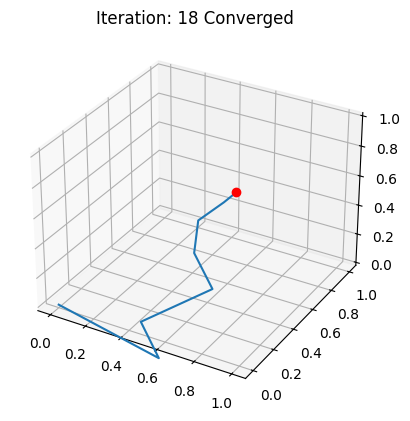

In [ ]:
link=[0.5,0.2,0.25,0.3,0.2,0.2,0.1]
target=[0.7,0.5,0.7]
c_soc=1.49445
c_cog=1.49445
w=0.5
pop_size=100
max_iter=5000
alpha_values=[-np.pi/2,np.pi/2,-np.pi/2,np.pi/2,-np.pi/2,0,0]
constraints_theta=[[-np.pi,np.pi],[-np.pi/2,np.pi/6],[-np.pi/2,2*np.pi/3],[-np.pi,np.pi],[-np.pi,np.pi],[-np.pi,np.pi],[-np.pi/6,np.pi/2]]
theta,alpha,err, it, c = PSO.PSO(link, target, pop_size, max_iter, w, c_soc, c_cog, alpha_values, constraints_theta, type='absorb')
display.Display_animated(link,theta, alpha, target, 'constr_absorb')

MovieWriter ffmpeg unavailable; using Pillow instead.


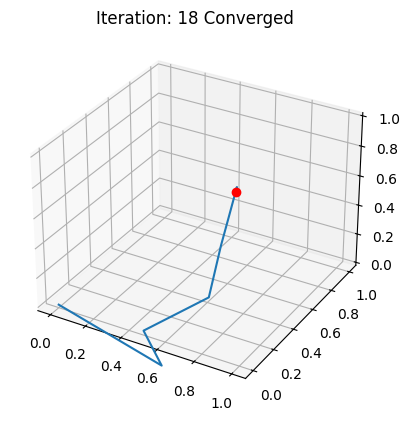

In [11]:
theta,alpha,err, it, c = PSO.PSO(link, target, pop_size, max_iter, w, c_soc, c_cog, alpha_values, constraints_theta, type='reflect')
display.Display_animated(link,theta, alpha, target, 'constr_reflect')

MovieWriter ffmpeg unavailable; using Pillow instead.


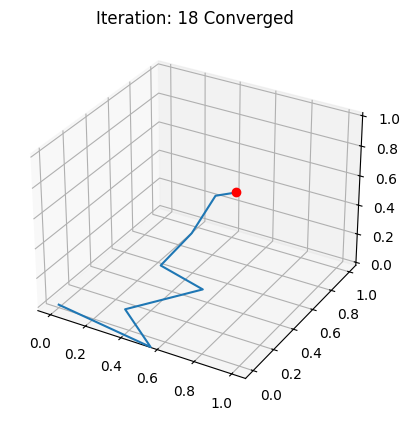

In [12]:
theta,alpha,err, it, c = PSO.PSO(link, target, pop_size, max_iter, w, c_soc, c_cog, alpha_values, constraints_theta, type='damping')
display.Display_animated(link,theta, alpha, target, 'constr_damp')

# Hiperparameter study

### Case 1

In [ ]:
link=[2,1,3]
target=[4,4,4]
c_soc=1.49445
c_cog=1.49445
pop_size=100
max_iter=5000

In [24]:
w_values= [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
n_it=50
mean_it=np.zeros(len(w_values))
mean_err=np.zeros(len(w_values))
std_it=np.zeros(len(w_values))
std_err=np.zeros(len(w_values))

#count[0]=number of times the algorithm converged
#count[1]=number of times the algorithm reached the maximum number of iterations
#count[2]=number of times the algorithm reached a stationary point
for j,w in enumerate(w_values):
    it=np.zeros(n_it)
    err=np.zeros(n_it)
    count=np.array([0,0,0])
    for i in range(n_it):
        _,_,err[i], it[i], c = PSO.PSO(link, target, pop_size, max_iter, w, c_soc, c_cog)
        count+=c
    print(f'w={w} c=={count}')
    mean_it[j]=np.mean(it)
    std_it[j]=np.std(it)
    mean_err[j]=np.mean(err)
    std_err[j]=np.std(err)

w=0.0 c==[23  0 27]
w=0.1 c==[46  0  4]
w=0.2 c==[47  0  3]
w=0.3 c==[48  0  2]
w=0.4 c==[50  0  0]
w=0.5 c==[48  0  2]
w=0.6 c==[50  0  0]
w=0.7 c==[49  0  1]
w=0.8 c==[50  0  0]
w=0.9 c==[50  0  0]


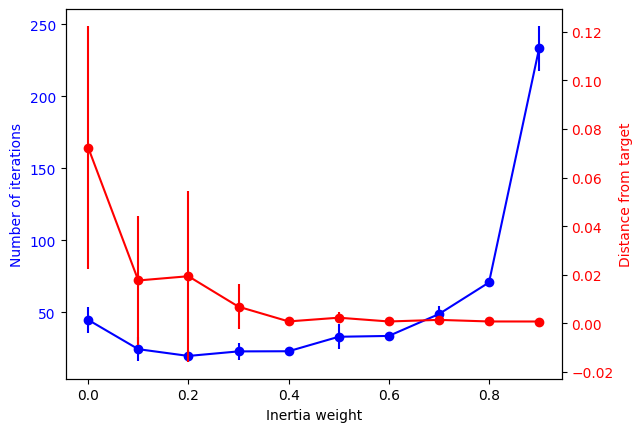

In [27]:
#plot the results
fig, ax1 = plt.subplots()
ax1.set_xlabel('Inertia weight')
ax1.set_ylabel('Number of iterations', color='b')
ax1.errorbar(w_values, mean_it, yerr=std_it*1.96/(np.sqrt(50)), fmt='o-', color='b')
ax1.tick_params(axis='y', labelcolor='b')
ax2 = ax1.twinx()
ax2.set_ylabel('Distance from target', color='r')
ax2.errorbar(w_values, mean_err, yerr=std_err*1.96/np.sqrt(50), fmt='o-', color='r')
ax2.tick_params(axis='y', labelcolor='r')
plt.show()

MovieWriter ffmpeg unavailable; using Pillow instead.


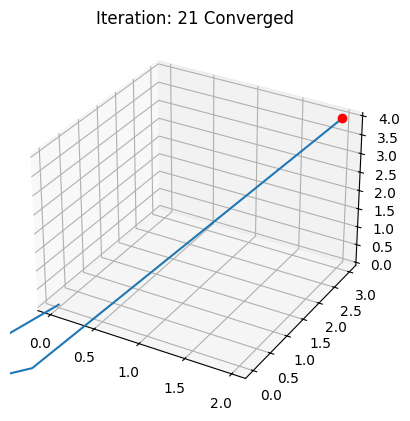

In [28]:
#seems that the best value for the inertia weight is 0.5
#let's see how the algorithm behaves with this value
theta,alpha,err, it, c = PSO.PSO(link, target, pop_size, max_iter, 0.4, c_soc, c_cog)
display.Display_animated(link,theta, alpha, target, 'best_w')    

### Case 2

In [ ]:
link=[2,1,3,2]
target=[2,3,4]
c_soc=1.49445
c_cog=1.49445
pop_size=100
max_iter=5000

In [31]:
w_values= [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
n_it=50
mean_it=np.zeros(len(w_values))
mean_err=np.zeros(len(w_values))
std_it=np.zeros(len(w_values))
std_err=np.zeros(len(w_values))
#count[0]=number of times the algorithm converged
#count[1]=number of times the algorithm reached the maximum number of iterations
#count[2]=number of times the algorithm reached a stationary point
for j,w in enumerate(w_values):
    it=np.zeros(n_it)
    err=np.zeros(n_it)
    count=np.array([0,0,0])
    for i in range(n_it):
        _,_,err[i], it[i], c = PSO.PSO(link, target, pop_size, max_iter, w, c_soc, c_cog)
        count+=c
    print(f'w={w}, count={count}')
    mean_it[j]=np.mean(it)
    std_it[j]=np.std(it)
    mean_err[j]=np.mean(err)
    std_err[j]=np.std(err)

w=0.0, count=[31  0 19]
w=0.1, count=[48  0  2]
w=0.2, count=[50  0  0]
w=0.3, count=[50  0  0]
w=0.4, count=[50  0  0]
w=0.5, count=[50  0  0]
w=0.6, count=[50  0  0]
w=0.7, count=[50  0  0]
w=0.8, count=[50  0  0]
w=0.9, count=[50  0  0]


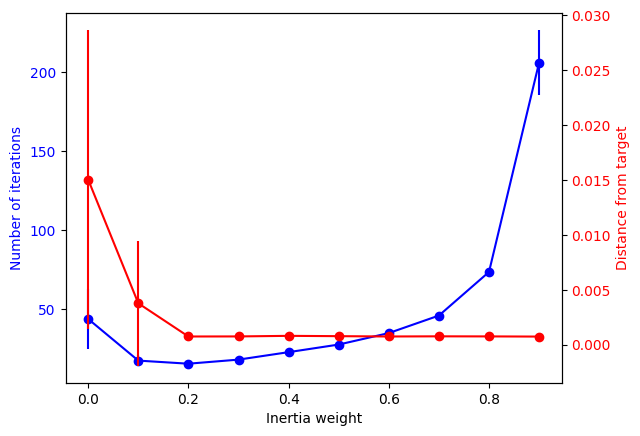

In [32]:
#plot the results
fig, ax1 = plt.subplots()
ax1.set_xlabel('Inertia weight')
ax1.set_ylabel('Number of iterations', color='b')
ax1.errorbar(w_values, mean_it, yerr=std_it*1.96/(np.sqrt(50)), fmt='o-', color='b')
ax1.tick_params(axis='y', labelcolor='b')
ax2 = ax1.twinx()
ax2.set_ylabel('Distance from target', color='r')
ax2.errorbar(w_values, mean_err, yerr=std_err*1.96/np.sqrt(50), fmt='o-', color='r')
ax2.tick_params(axis='y', labelcolor='r')
plt.show()

MovieWriter ffmpeg unavailable; using Pillow instead.


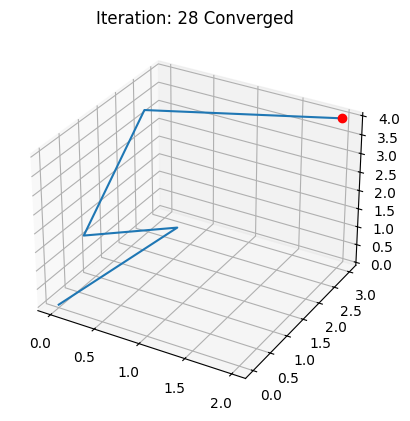

In [ ]:
#best value for the inertia weight is 0.5
#let's see how the algorithm behaves with this value
w_best=0.2
theta,alpha,err, it, c = PSO.PSO(link, target, pop_size, max_iter, w_best, c_soc, c_cog)   
display.Display_animated(link,theta, alpha, target, 'best_w_case2')

In [42]:
c_soc_values=[0.5,1.0,1.5,2.0,2.5,3.0]
max_iter=500
n_it=50
mean_it=np.zeros(len(c_soc_values))
mean_err=np.zeros(len(c_soc_values))
std_it=np.zeros(len(c_soc_values))
std_err=np.zeros(len(c_soc_values))
#count[0]=number of times the algorithm converged
#count[1]=number of times the algorithm reached the maximum number of iterations
#count[2]=number of times the algorithm reached a stationary point
for j,c_soc in enumerate(c_soc_values):
    it=np.zeros(n_it)
    err=np.zeros(n_it)
    count=np.array([0,0,0])
    for i in range(n_it):
        _,_,err[i], it[i], c = PSO.PSO(link, target, pop_size, max_iter, w_best, c_soc, c_cog)
        count+=c
    print(f'c_soc={c_soc}, count={count}')
    mean_it[j]=np.mean(it)
    std_it[j]=np.std(it)
    mean_err[j]=np.mean(err)
    std_err[j]=np.std(err)

c_soc=0.5, count=[11 39  0]
c_soc=1.0, count=[46  0  4]
c_soc=1.5, count=[50  0  0]
c_soc=2.0, count=[50  0  0]
c_soc=2.5, count=[50  0  0]
c_soc=3.0, count=[50  0  0]


For small values of c_soc the algorithm is not able to find the best for more than a half of values. It's confirmed that a good value for c_soc may be around 1.5

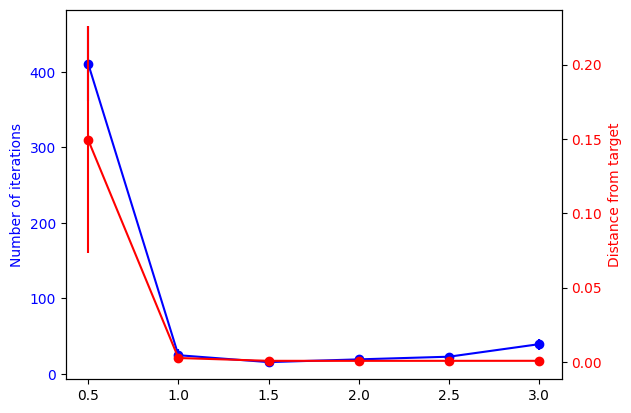

In [43]:
#plot the results
fig, ax1 = plt.subplots()
ax1.set_xlabel('C social')
ax1.set_ylabel('Number of iterations', color='b')
ax1.errorbar(c_soc_values, mean_it, yerr=std_it*1.96/(np.sqrt(50)), fmt='o-', color='b')
ax1.tick_params(axis='y', labelcolor='b')
ax2 = ax1.twinx()
ax2.set_ylabel('Distance from target', color='r')
ax2.errorbar(c_soc_values, mean_err, yerr=std_err*1.96/np.sqrt(50), fmt='o-', color='r')
ax2.tick_params(axis='y', labelcolor='r')
plt.show()

In [44]:
c_soc_best=1.49445

In [45]:
c_cog_values=[0.5,1.0,1.5,2.0,2.5,3.0]
max_iter=500
n_it=50
mean_it=np.zeros(len(c_cog_values))
mean_err=np.zeros(len(c_cog_values))
std_it=np.zeros(len(c_cog_values))
std_err=np.zeros(len(c_cog_values))
#count[0]=number of times the algorithm converged
#count[1]=number of times the algorithm reached the maximum number of iterations
#count[2]=number of times the algorithm reached a stationary point
for j,c_cog in enumerate(c_cog_values):
    it=np.zeros(n_it)
    err=np.zeros(n_it)
    count=np.array([0,0,0])
    for i in range(n_it):
        _,_,err[i], it[i], c = PSO.PSO(link, target, pop_size, max_iter, w_best, c_soc_best, c_cog)
        count+=c
    print(f'c_soc={c_soc}, count={count}')
    mean_it[j]=np.mean(it)
    std_it[j]=np.std(it)
    mean_err[j]=np.mean(err)
    std_err[j]=np.std(err)

c_soc=3.0, count=[48  0  2]
c_soc=3.0, count=[49  0  1]
c_soc=3.0, count=[50  0  0]
c_soc=3.0, count=[50  0  0]
c_soc=3.0, count=[49  0  1]
c_soc=3.0, count=[50  0  0]


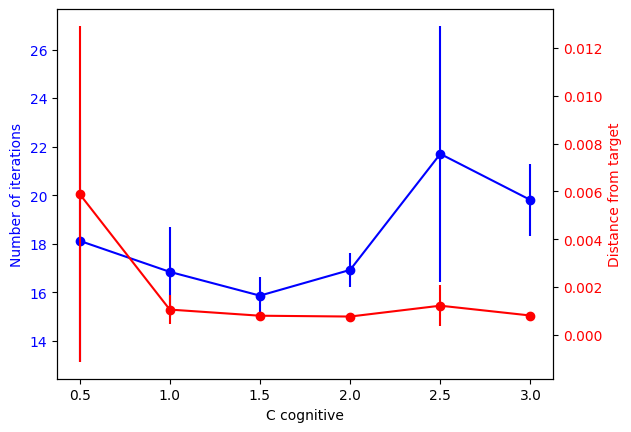

In [46]:
#plot the results
fig, ax1 = plt.subplots()
ax1.set_xlabel('C cognitive')
ax1.set_ylabel('Number of iterations', color='b')
ax1.errorbar(c_cog_values, mean_it, yerr=std_it*1.96/(np.sqrt(50)), fmt='o-', color='b')
ax1.tick_params(axis='y', labelcolor='b')
ax2 = ax1.twinx()
ax2.set_ylabel('Distance from target', color='r')
ax2.errorbar(c_cog_values, mean_err, yerr=std_err*1.96/np.sqrt(50), fmt='o-', color='r')
ax2.tick_params(axis='y', labelcolor='r')
plt.show()

In [ ]:
c_cog_best=1.49445

In [5]:
#let's try to vary both c_soc and c_cog
c_cog=[0.5,1.0,1.5,2.0,2.5,3.0]
c_soc=[0.5,1.0,1.5,2.0,2.5,3.0]
max_iter=500
n_it=50
mean_it=np.zeros((len(c_cog),len(c_soc)))
mean_err=np.zeros((len(c_cog),len(c_soc)))
std_it=np.zeros((len(c_cog),len(c_soc)))
std_err=np.zeros((len(c_cog),len(c_soc)))
#count[0]=number of times the algorithm converged
#count[1]=number of times the algorithm reached the maximum number of iterations
#count[2]=number of times the algorithm reached a stationary point
for i,cog in enumerate(c_cog):
    for j,soc in enumerate(c_soc):
        it=np.zeros(n_it)
        err=np.zeros(n_it)
        count=np.array([0,0,0])
        for k in range(n_it):
            _,_,err[k], it[k], c = PSO.PSO(link, target, pop_size, max_iter, w_best, soc, cog)
            count+=c
        print(f'c_soc={soc}, c_cog={cog}, count={count}')
        mean_it[i,j]=np.mean(it)
        std_it[i,j]=np.std(it)
        mean_err[i,j]=np.mean(err)
        std_err[i,j]=np.std(err)

c_soc=0.5, c_cog=0.5, count=[11 38  1]
c_soc=1.0, c_cog=0.5, count=[41  0  9]
c_soc=1.5, c_cog=0.5, count=[49  0  1]
c_soc=2.0, c_cog=0.5, count=[50  0  0]
c_soc=2.5, c_cog=0.5, count=[50  0  0]
c_soc=3.0, c_cog=0.5, count=[50  0  0]
c_soc=0.5, c_cog=1.0, count=[11 39  0]
c_soc=1.0, c_cog=1.0, count=[39  1 10]
c_soc=1.5, c_cog=1.0, count=[49  0  1]
c_soc=2.0, c_cog=1.0, count=[50  0  0]
c_soc=2.5, c_cog=1.0, count=[50  0  0]
c_soc=3.0, c_cog=1.0, count=[50  0  0]
c_soc=0.5, c_cog=1.5, count=[ 5 45  0]
c_soc=1.0, c_cog=1.5, count=[44  1  5]
c_soc=1.5, c_cog=1.5, count=[50  0  0]
c_soc=2.0, c_cog=1.5, count=[50  0  0]
c_soc=2.5, c_cog=1.5, count=[50  0  0]
c_soc=3.0, c_cog=1.5, count=[50  0  0]
c_soc=0.5, c_cog=2.0, count=[12 38  0]
c_soc=1.0, c_cog=2.0, count=[45  1  4]
c_soc=1.5, c_cog=2.0, count=[50  0  0]
c_soc=2.0, c_cog=2.0, count=[50  0  0]
c_soc=2.5, c_cog=2.0, count=[50  0  0]
c_soc=3.0, c_cog=2.0, count=[48  2  0]
c_soc=0.5, c_cog=2.5, count=[29 21  0]
c_soc=1.0, c_cog=2.5, cou

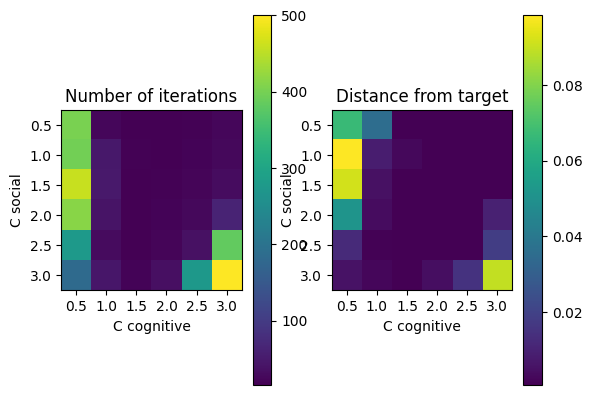

In [10]:
#2 subplot one in 3d and one heatmap
fig, ax = plt.subplots(1,2)
X, Y = np.meshgrid(c_cog, c_soc)
im = ax[0].imshow(mean_it, cmap='viridis')
ax[0].set_xticks(np.arange(len(c_cog)))
ax[0].set_yticks(np.arange(len(c_soc)))
ax[0].set_xticklabels(c_cog)
ax[0].set_yticklabels(c_soc)
ax[0].set_xlabel('C cognitive')
ax[0].set_ylabel('C social')

ax[0].set_title('Number of iterations')
fig.colorbar(im, ax=ax[0])
im = ax[1].imshow(mean_err, cmap='viridis')
ax[1].set_xticks(np.arange(len(c_cog)))
ax[1].set_yticks(np.arange(len(c_soc)))
ax[1].set_xticklabels(c_cog)
ax[1].set_yticklabels(c_soc)
ax[1].set_xlabel('C cognitive')
ax[1].set_ylabel('C social')

ax[1].set_title('Distance from target')
fig.colorbar(im, ax=ax[1])
plt.show()

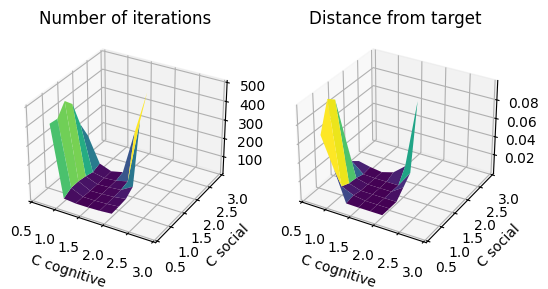

In [22]:
fig, ax = plt.subplots(1, 2, subplot_kw={'projection': '3d'})

X, Y = np.meshgrid(c_cog, c_soc)

# First subplot
im = ax[0].plot_surface(X, Y, mean_it, cmap='viridis')
ax[0].set_xticks(np.arange(len(c_cog)))
ax[0].set_yticks(np.arange(len(c_soc)))
ax[0].set_xticklabels(c_cog)
ax[0].set_yticklabels(c_soc)
ax[0].set_xlabel('C cognitive')
ax[0].set_ylabel('C social')
ax[0].set_title('Number of iterations')

# Second subplot
im = ax[1].plot_surface(X, Y, mean_err, cmap='viridis')
ax[1].set_xticks(np.arange(len(c_cog)))
ax[1].set_yticks(np.arange(len(c_soc)))
ax[1].set_xticklabels(c_cog)
ax[1].set_yticklabels(c_soc)
ax[1].set_xlabel('C cognitive')
ax[1].set_ylabel('C social')
ax[1].set_title('Distance from target')

plt.show()